

* Berlian Muhammad Galin Al Awienoor (1301204378)
* Kiki Dwi Prasetyo (1301204027)



In [ ]:
import pandas as pd             # library untuk membaca file bengkel.xlsx
import numpy as np              # membaca data array
import matplotlib.pyplot as plt # membuat grafik

In [ ]:
#import file excel sebagai inputan
from google.colab import files
uploaded = files.upload()
dataset = pd.read_excel("bengkel.xlsx") # membaca file bengkel
dataset

Saving bengkel.xlsx to bengkel (7).xlsx


id  servis  harga
0     1      58      7
1     2      54      1
2     3      98      2
3     4      52      4
4     5      11      4
..  ...     ...    ...
95   96      30      1
96   97      25      3
97   98      27     10
98   99       8      6
99  100      11      8

[100 rows x 3 columns]

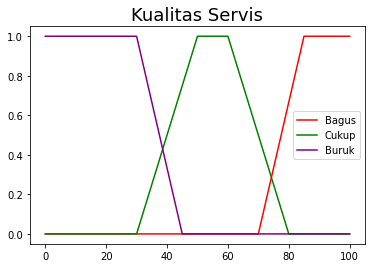

In [ ]:
# Menentukan batas keanggotaan servis
def servis():
  x3 = [0, 70, 85, 100]          # Bagus
  y3 = [0, 0, 1, 1]
  
  x2 = [0, 30, 50, 60, 80, 100]  # Cukup
  y2 = [0, 0, 1, 1, 0, 0] 
    
  x1 = [0, 30, 45, 100]          # Buruk
  y1 = [1, 1, 0, 0]
  
  # GRAFIK KUALITAS SERVIS
  plt.title("Kualitas Servis", fontsize=18)
  plt.plot(x3, y3, label="Bagus", color="red")
  plt.plot(x2, y2, label="Cukup", color="green")  
  plt.plot(x1, y1, label="Buruk", color="purple")
  
  plt.legend()
  plt.show()

servis()


In [ ]:
# Fungsi keanggotaan servis
def membership_servis_bagus(data):
  if data <= 70:
    return 0
  elif data >= 85:
    return 1
  elif data > 70 and data <= 85:
    return (data - 70) / (85 - 70)

def membership_servis_cukup(data):
  if data <= 30 or data >= 80:
    return 0
  elif data >= 50 and data <= 60:
    return 1
  elif data >= 30 and data < 50:
    return (data - 30) / (50 - 30)
  elif data > 60 and data < 80:
    return (80 - data) / (80 - 60)

def membership_servis_buruk(data):
  if data <= 30:
    return 1
  elif data > 45:
    return 0
  elif data > 30 and data <= 45:
    return (45 - data) / (45 - 30)

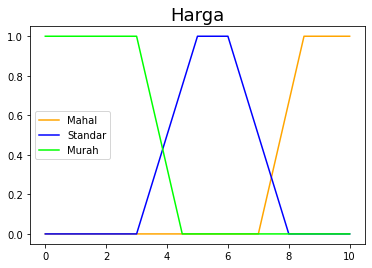

In [ ]:
# Menentukan batas keanggotaan harga
def harga():
  x3 = [0, 7, 8.5, 10]      # Mahal
  y3 = [0, 0, 1, 1]  
  
  x2 = [0, 3, 5, 6, 8, 10]  # Standar
  y2 = [0, 0, 1, 1, 0, 0]  
  
  x1 = [0, 3, 4.5, 10]      # Murah
  y1 = [1, 1, 0, 0]

  # GRAFIK HARGA
  plt.title("Harga", fontsize=18)
  plt.plot(x3, y3, label="Mahal", color="orange")
  plt.plot(x2, y2, label="Standar", color="blue")
  plt.plot(x1, y1, label="Murah", color="lime")

  plt.legend()
  plt.show()

print("")
harga()


In [ ]:
# Fungsi keanggotaan Harga
def harga_membership_mahal(data):
  if data <= 7:
    return 0
  elif data >= 8.5:
    return 1
  elif data > 7 and data <= 8.5:
    return (data - 7) / (8.5 - 7)
  
def harga_membership_standar(data):
  if data <= 3 or data >= 8:
    return 0
  elif data >= 5 and data <= 6:
    return 1
  elif data >= 3 and data < 5:
    return (data - 3) / (5 - 3)
  elif data > 6 and data < 8:
    return (8 - data) / (8 - 6)
  
def harga_membership_murah(data):
  if data <= 3:
    return 1
  elif data > 4.5:
    return 0
  elif data > 3 and data <= 4.5:
    return (4.5 - data) / (4.5 - 3)

In [ ]:
# Fuzzification mengubah masukan yang nilai kebenarannya bersifat pasti (crisp input) menjadi fuzzy input, 
# yang berupa nilai linguistik, di mana semantiknya ditentukan berdasarkan fungsi keanggotaan tertentu

def fuzzy_servis(data):
  servis = {
      'buruk' : membership_servis_buruk(data),
      'cukup' : membership_servis_cukup(data),
      'bagus' : membership_servis_bagus(data)
  }
  return servis

def fuzzy_harga(data):
  harga = {
      'murah' : harga_membership_murah(data),
      'standar' : harga_membership_standar(data),
      'mahal' : harga_membership_mahal(data)
  }
  return harga

In [ ]:
# Inferensi terdapat 2 model yaitu model mamdani dan model sugeno,
# Model yang kita pakai adalah model sugeno
def inference(nilai_servis, nilai_harga):
  rules = {
      'Not Recommend' : [],
      'Recommend' : []
  }

  result = {
      'Not Recommend' : [],
      'Recommend' : []
  }

  # RULES IF THEN ( Aturan Fuzzy Untuk NK ( Nilai Kelayakan ))
  rules["Not Recommend"].append(min(nilai_servis['buruk'], nilai_harga['mahal']))
  rules["Not Recommend"].append(min(nilai_servis['buruk'], nilai_harga['standar']))
  rules["Recommend"].append(min(nilai_servis['buruk'], nilai_harga['murah']))
 
  rules["Not Recommend"].append(min(nilai_servis['cukup'], nilai_harga['mahal']))
  rules["Recommend"].append(min(nilai_servis['cukup'], nilai_harga['standar']))
  rules["Recommend"].append(min(nilai_servis['cukup'], nilai_harga['murah']))

  rules["Recommend"].append(min(nilai_servis['bagus'], nilai_harga['mahal']))
  rules["Recommend"].append(min(nilai_servis['bagus'], nilai_harga['standar']))
  rules["Recommend"].append(min(nilai_servis['bagus'], nilai_harga['murah']))
  
  
  result["Not Recommend"].append(max(rules["Not Recommend"]))
  result["Recommend"].append(max(rules["Recommend"]))

  return result

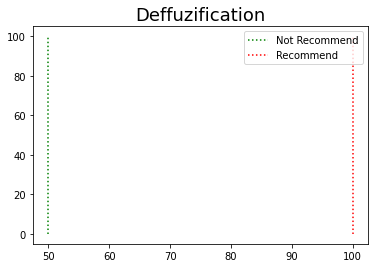

In [ ]:
def sugeno_model(): 
  # GRAFIK DEFUZZYFICATION
  plt.title("Deffuzification", fontsize=18)
  plt.vlines(50, 0, 100, linestyles="dotted", colors ="g", label="Not Recommend")
  plt.vlines(100, 0, 100, linestyles="dotted", colors ="r", label="Recommend")
  plt.legend()
  plt.show()

sugeno_model()

In [ ]:
# Defuzzification mengubah fuzzy output menjadi crisp value berdasarkan fungsi keanggotaan yang telah ditentukan.
def deffuzification(rules):
  recomend = 100
  not_recomend = 50

  for i in rules.values():
    for j in range(len(i)):
      result = ((rules['Not Recommend'][j] * not_recomend) +  (rules['Recommend'][j] * recomend)) / (rules['Not Recommend'][j] + rules['Recommend'][j])
  return result

In [ ]:
# Output untuk dataset peringkat berupa excel
data = dataset.to_numpy()

result = []
for i in range(len(data)):
  inf = inference(fuzzy_servis(data[i, 1]),fuzzy_harga(data[i, 2]))
  deffuzy = deffuzification(inf)
  temp = [i + 1, deffuzy]
  result.append(temp)

result.sort(key =  lambda x: x[1], reverse=True)

terbaik = result[:10] # 10 data terbaik

best = pd.DataFrame(terbaik, columns=['ID', 'Skor'])
best.to_excel('peringkat.xlsx', index=False)

peringkat = pd.read_excel("peringkat.xlsx")
peringkat

ID  Skor
0   1   100
1   2   100
2   3   100
3   4   100
4   9   100
5  15   100
6  16   100
7  17   100
8  19   100
9  21   100